In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [781]:
stud = pd.read_csv('./stud_math.csv')
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [382]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
"""
Всего колонок - 30
Числовых - 13
Не числовых - 17

Кол-во записей - 395

studytime, granular - неизвестная колонка, описания данных не приведено. следует присмотреться к данным после очистки

числовые колонки:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime,
 'granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
""""

# 0 School

In [ ]:
# аббревиатура школы, в которой учится ученик

In [5]:
stud.school.unique()

array(['GP', 'MS'], dtype=object)

In [23]:
stud.school.describe()

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

In [202]:
stud.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [24]:
stud.school.value_counts(normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

<AxesSubplot:>

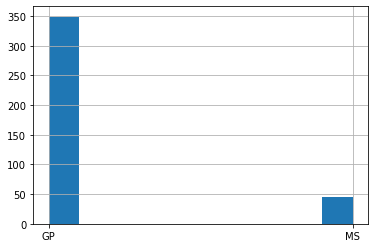

In [25]:
stud.school.hist()

In [ ]:
"""
В колонке нет пропусков данных
В данных только 2 уникальных значения - ['GP', 'MS'], с явным преобладанием GP (88.4 %) над 'MS' (11.6 %)
"""

# 1 Sex

In [ ]:
# пол ученика ('F' - женский, 'M' - мужской)

In [26]:
stud.sex.unique()

array(['F', 'M'], dtype=object)

In [27]:
stud.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [30]:
stud.sex.value_counts(normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

<AxesSubplot:>

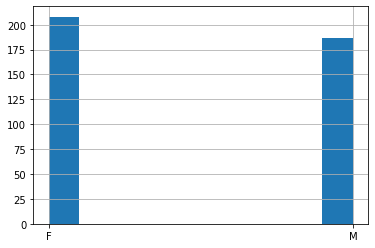

In [31]:
stud.sex.hist()

In [ ]:
"""
В колонке нет пропусков данных
В данных только 2 уникальных значения - ['F', 'M'], с небольшим преобладанием 'F' (52.65 %) над 'MS' (47.35 %)
Думаю, в пределах нормы
"""

# 2 Age

In [ ]:
# возраст ученика (от 15 до 22)

In [34]:
stud.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

<AxesSubplot:title={'center':'Количество учеников по возрасту'}>

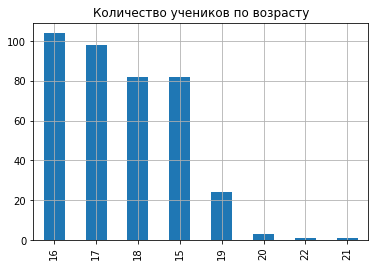

In [59]:
stud.age.value_counts().plot(kind = 'bar', grid = True, title = 'Количество учеников по возрасту')

In [56]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

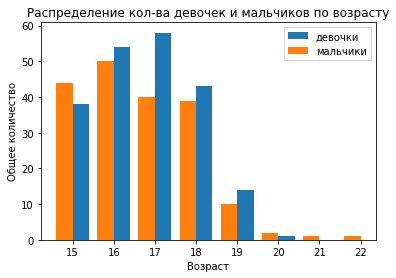

In [153]:
age_sex_f = pd.DataFrame(stud[stud.sex == 'F']['age'].value_counts())
age_sex_f = age_sex_f.reset_index()
age_sex_f.columns = ['age','count']
# age_sex_f
age_sex_m = pd.DataFrame(stud[stud.sex == 'M']['age'].value_counts())
age_sex_m = age_sex_m.reset_index()
age_sex_m.columns = ['age','count']
# age_sex_m

fig, ax = plt.subplots()

ax.bar(age_sex_f['age'], age_sex_f['count'], width = 0.4, align = 'edge', label = 'девочки')
ax.bar(age_sex_m['age'], age_sex_m['count'], width = -0.4, align = 'edge', label = 'мальчики')
ax.set_title('Распределение кол-ва девочек и мальчиков по возрасту')
ax.set_ylabel('Общее количество')
ax.set_xlabel('Возраст')
ax.legend(loc = 1)

plt.show()

In [161]:
q1 = round(stud.age.quantile(q=0.25, interpolation='midpoint'), 2)
q3 = round(stud.age.quantile(q=0.75, interpolation='midpoint'), 2)
irq = q3 - q1
vibros_min = stud.age.min() < (q1 - (1.5 * irq))
vibros_max = stud.age.max() > (q3 + (1.5 * irq))
print ("Есть-ли выбросы в данных?")
print ("Снизу : %s" % vibros_min)
print ("Сверху : %s" % vibros_max)

Есть-ли выбросы в данных?
Снизу : False
Сверху : True


In [178]:
((stud[(stud.age == 17) & (stud.sex == 'F')]['age'].value_counts() / stud[stud.age == 17]['age'].value_counts()) * 100).round(2)

17    59.18
Name: age, dtype: float64

In [146]:
"""
В колонке нет пропусков данных
Данные в пределах указанных значений, с небольшим смещением в право
Большая часть данных находится в диапазоне [15, 18]
Выбросы есть, сверху. Однако, считаю что данные с выбросами удалять нельзя, т.к. они в пределах указанных значений
Интересная особенность данных - девочек 17-ти лет представлено почти на 20% больше чем мальчиков того-же возраста,
при том для данных по другим возрастным группам, таких больших отклонений нет
"""

# 3 Address 

In [ ]:
# тип адреса ученика ('U' - городской, 'R' - за городом)

In [256]:
stud.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [257]:
stud.address.unique()

array(['U', nan, 'R'], dtype=object)

In [258]:
stud.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [259]:
stud.address.value_counts(normalize=True)

U    0.780423
R    0.219577
Name: address, dtype: float64

In [483]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.address = stud.address.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [261]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.address.values != None ].address.count() / len(stud)) * 100).round(2))

95.7


<AxesSubplot:>

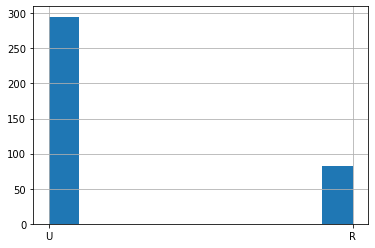

In [193]:
stud.address.hist()

In [ ]:
"""
Посмотрим на соотношение данных по колонкам 'school' и 'address', 
т.к. можно предположить, что раз какое-то кол-во учеников живут за городом, то и в школу они ходят за городом,
соотно-то, можно предположить что одна из школ в колонке 'school' может находиться за городом 
"""

<AxesSubplot:xlabel='school,address'>

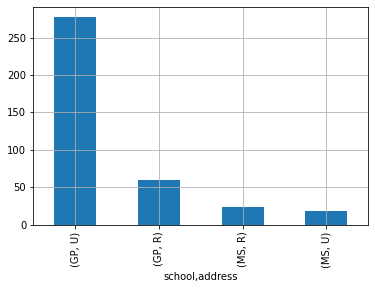

In [214]:
stud.groupby(by = ['school'])['address'].value_counts().plot(kind = 'bar', grid= True)

In [ ]:
"""
В колонке есть пропуски данных, чуть менее 5%. Заменены на None, не удалялись
В данных только 2 уникальных значения - ['U', 'R'], с большим преобладанием 'U' (78 %) над 'R' (22 %)

По отношению данных, можно предположить, что школа 'GP' из колонки 'school' скорее всего находится в городе,
а школа 'MS' скорее всего находится не в городе, или на окраинах города
"""

# 4 famsize

In [246]:
# размер семьи('LE3' <= 3, 'GT3' >3)

In [248]:
stud.famsize.describe()

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [249]:
stud.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [250]:
stud.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [251]:
stud.famsize.value_counts(normalize=True)

GT3    0.709239
LE3    0.290761
Name: famsize, dtype: float64

In [613]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.famsize = stud.famsize.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [614]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.famsize.values != 'None' ].famsize.count() / len(stud)) * 100).round(2))

93.15


<AxesSubplot:>

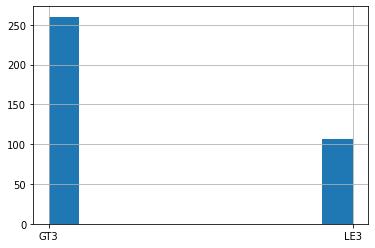

In [615]:
stud.famsize.hist()

In [ ]:
"""
В колонке есть пропуски данных, чуть менее 7%. Заменены на None, не удалялись
None могут говорить как об ошибках в данных, так и о том, что ученик не имеет родителей

По данным видно, что большая часть семей имеет 4 и более человек (71% к 29%), что может говорить о хорошей рождаемости 
и невысоком кол-ве семей в разводах
Следует в дальнейшем использовать данные из этой колонки для проверок гипотез об влиянии полных\не полных семей на другие показатели
"""

# 5 Pstatus

In [ ]:
# статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [291]:
stud.Pstatus.describe()

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

In [293]:
stud.Pstatus.unique()

array(['A', nan, 'T'], dtype=object)

In [294]:
stud.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [295]:
stud.Pstatus.value_counts(normalize=True)

T    0.897143
A    0.102857
Name: Pstatus, dtype: float64

In [485]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.Pstatus = stud.Pstatus.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [300]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.Pstatus.values != 'None' ].Pstatus.count() / len(stud)) * 100).round(2))

88.61


<AxesSubplot:>

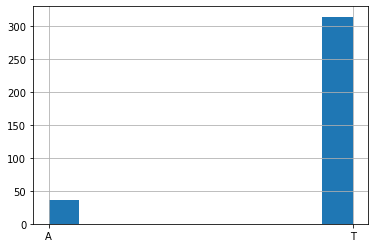

In [301]:
stud.Pstatus.hist()

In [ ]:
"""
Проверим отношение семей с 4 и более чел со статусом жилья родителей
Возможно, если будет найдена корреляция, это сможет нам помочь заполнить данные из 'famsize'
"""

<AxesSubplot:xlabel='famsize,Pstatus'>

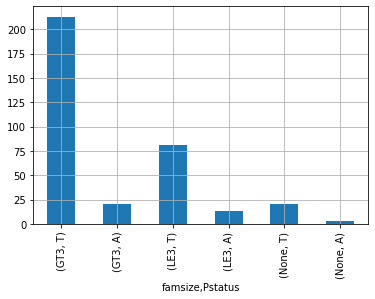

In [303]:
stud.groupby(by = ['famsize'])['Pstatus'].value_counts().plot(kind = 'bar', grid= True)

In [ ]:
"""
Корреляциии не наблюдается, т.к довольно много семей из 3х человек, родители которых живут вместе
т.е. в такой семье есть оба родителя и один ребенок
"""

In [304]:
stud.groupby(by = ['famsize'])['Pstatus'].value_counts()

famsize  Pstatus
GT3      T          213
         A           20
LE3      T           81
         A           13
None     T           20
         A            3
Name: Pstatus, dtype: int64

In [316]:
"""
Процент семей в 4 и более чел, но родители которых живут отдельно
"""
print (round((20 / len(stud)) * 100, 2))

5.06


In [317]:
"""
Процент семей в 3 и более чел, но родители которых вместе - т.е., один ребенок в семье
"""
print (round((81 / len(stud)) * 100, 2))

20.51


In [ ]:
"""
В колонке есть пропуски данных, более 11%. Заменены на None, не удалялись, хотя есть предположегие что такие данные следует 
удалить (колонку), из-за большого кол-ва пропусков и непонятной смысловой составляющей этих данных. 
Возможно, могут быть другие корреляции и влияние на Target
None могут говорить об ошибках в данных

По данным видно, что большая часть семей мивут с 2мя родителями (90% к 10%), что может говорить низком кол-ве разводов и смертности
Однако, замечено что 
- 5% учеников живут в семьях с одним родителем, но с общим кол-вом 4 и более чел, что настораживает
может говорить как том, что данные собраны с неточностями (к примеру, в члены семьи могли быть включены более дальние родственники),
либо о включении отчимов в члены семьи, но указанием на то, что один из родных родителей живет отдельно.
- 20.5% учеников живут в семьях с одинм ребенком

Следует в дальнейшем использовать данные из этой колонки для проверок гипотез об влиянии семей на другие показатели
"""

# 6 Medu

In [ ]:
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [320]:
stud.Medu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [386]:
stud.Medu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [322]:
stud.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

<AxesSubplot:title={'center':'Распределение матерей учеников по побразованию'}>

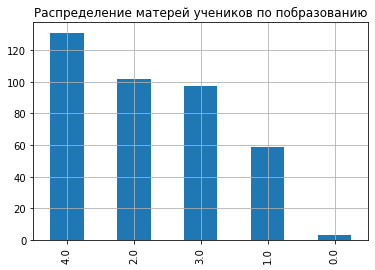

In [329]:
stud.Medu.value_counts().plot(kind = 'bar', grid = True, title = 'Распределение матерей учеников по побразованию')

In [333]:
stud.Medu.value_counts(normalize=True)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [487]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.Medu.values != None ].Medu.count() / len(stud)) * 100).round(2))

99.24


In [ ]:
"""
В колонке очень мало пропусков данных, менее 1%, что может говорить о высыкой пользе этих данных в дальнейшем
"""

# 7 Fedu 

In [ ]:
# образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [488]:
stud.Fedu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [489]:
stud.Fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [490]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

<AxesSubplot:title={'center':'Распределение отцов учеников по побразованию'}>

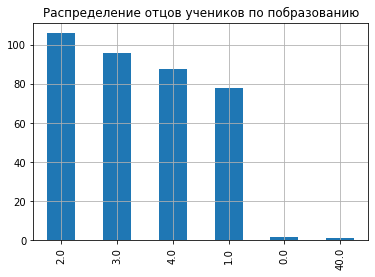

In [491]:
stud.Fedu.value_counts().plot(kind = 'bar', grid = True, title = 'Распределение отцов учеников по побразованию')

In [ ]:
"""
В данных присутсвуют nan-ы и одно значение в "40"
Кол-во nan-ов - 21 (около 5%)
При том, на графике видна схожесть значений по образованию отцов и матерей учеников.
Думаю, это следует рассмотреть на предмет корреляции этих колонок
"""

In [592]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.Fedu.values != None ].Fedu.count() / len(stud)) * 100).round(2))

93.92


In [782]:
"""
Т.к. в данных присутствует явно не правильное значение '40', то удалим строку с этим значением
"""
stud = stud.loc[stud['Fedu'] != 40]

In [783]:
"""
Посмотрим на корреляцию между колонками 'Fedu', 'Medu' и 'score'
"""
correlation = stud[['Fedu', 'Medu', 'score']].corr()
correlation

,Fedu,Medu,score
Fedu,1.000000,0.629956,0.130002
Medu,0.629956,1.000000,0.214119
score,0.130002,0.214119,1.000000


<AxesSubplot:>

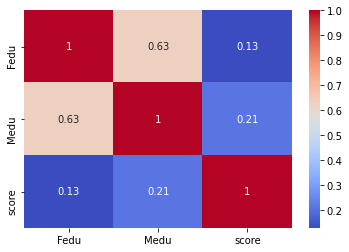

In [595]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.gcf().set_size_inches(12, 12)

In [ ]:
"""
Довольно высокая корреляция между данными в колонках 'Fedu' и 'Medu'
Так-же, заметно что корреляция между данными в 'score' и 'Medu' выше чем 'score' и 'Fedu'
Попробуем заполнить пропущенные данные в 'Fedu' из 'Medu'
"""

In [596]:
for i in range(len(stud)):
    if (stud.Fedu.iloc[i] not in [4., 1.,  2.,  3.,  0.]):
        stud.Fedu.iloc[i] = stud.Medu.iloc[i]

c:\python37\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [597]:
"""
Посмотрим снова на корреляцию между колонками 'Fedu', 'Medu' и 'score'
"""
correlation = stud[['Fedu', 'Medu', 'score']].corr()
correlation

,Fedu,Medu,score
Fedu,1.000000,0.652046,0.137702
Medu,0.652046,1.000000,0.214119
score,0.137702,0.214119,1.000000


<AxesSubplot:>

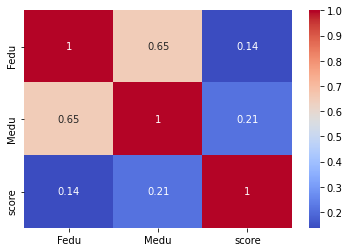

In [598]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.gcf().set_size_inches(12, 12)

In [ ]:
"""
Корреляция между колонками 'Fedu' и 'Medu' увеличилась и имеет довольно высокое значение в 0.65
Удалим колонку 'Fedu'
"""

In [784]:
stud.drop(['Fedu'], inplace = True, axis = 1)

# 8 Mjob

In [ ]:
# работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
# 'at_home' - не работает, 'other' - другое)

In [601]:
stud.Mjob.describe()

count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

In [603]:
stud.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [605]:
stud.Mjob.value_counts()

other       133
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [606]:
stud.Mjob.value_counts(normalize=True)

other       0.354667
services    0.258667
at_home     0.154667
teacher     0.146667
health      0.085333
Name: Mjob, dtype: float64

<AxesSubplot:>

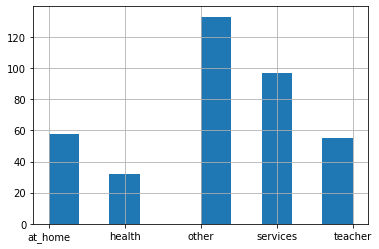

In [607]:
stud.Mjob.hist()

In [608]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.Mjob = stud.Mjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [612]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.Mjob.values != 'None' ].Mjob.count() / len(stud)) * 100).round(2))

95.18


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 5%. Заменены на None, не удалялись
Некоректных данных нет.
"""

# 9 Fjob

In [ ]:
# работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
# 'at_home' - не работает, 'other' - другое)

In [617]:
stud.Fjob.describe()

count       358
unique        5
top       other
freq        196
Name: Fjob, dtype: object

In [618]:
stud.Fjob.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [619]:
stud.Fjob.value_counts()

other       196
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [620]:
stud.Fjob.value_counts(normalize=True)

other       0.547486
services    0.284916
teacher     0.081006
at_home     0.044693
health      0.041899
Name: Fjob, dtype: float64

<AxesSubplot:>

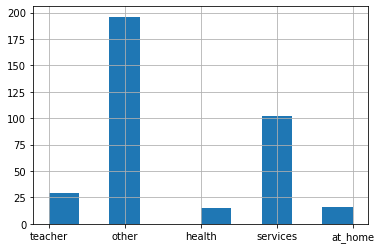

In [622]:
stud.Fjob.hist()

In [623]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.Fjob = stud.Fjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [624]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.Fjob.values != 'None' ].Fjob.count() / len(stud)) * 100).round(2))

90.86


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 10%. Заменены на None, не удалялись
Некоректных данных нет.
В связи с большим кол-вом пропусков в данных и большим кол-вом 'other' в дальнейшем следует рассмтореть целесообразность этой колонки,
возможно окажется не информативна
"""

# 10 reason

In [626]:
# причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# 'course' - образовательная программа, 'other' - другое)

In [629]:
stud.reason.describe()

count        377
unique         4
top       course
freq         137
Name: reason, dtype: object

In [630]:
stud.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [631]:
stud.reason.value_counts()

course        137
home          104
reputation    102
other          34
Name: reason, dtype: int64

In [632]:
stud.reason.value_counts(normalize=True)

course        0.363395
home          0.275862
reputation    0.270557
other         0.090186
Name: reason, dtype: float64

<AxesSubplot:>

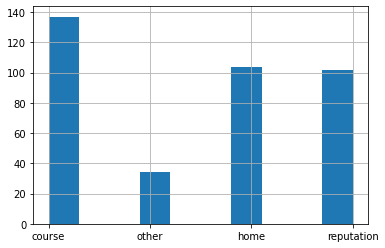

In [633]:
stud.reason.hist()

In [634]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.reason = stud.reason.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [635]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.reason.values != 'None' ].reason.count() / len(stud)) * 100).round(2))

95.69


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 5%. Заменены на None, не удалялись
Некоректных данных нет.
Кол-во 'other' ответов низкое, кроме того, невысокое кол-во пропусков в данных, могут говорить о потенцильном влиянии
значения данных из колонки на Target
"""

# 11 guardian

In [636]:
# опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [637]:
stud.guardian.describe()

count        363
unique         3
top       mother
freq         250
Name: guardian, dtype: object

In [638]:
stud.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [640]:
stud.guardian.value_counts()

mother    250
father     85
other      28
Name: guardian, dtype: int64

In [639]:
stud.guardian.value_counts(normalize=True)

mother    0.688705
father    0.234160
other     0.077135
Name: guardian, dtype: float64

<AxesSubplot:>

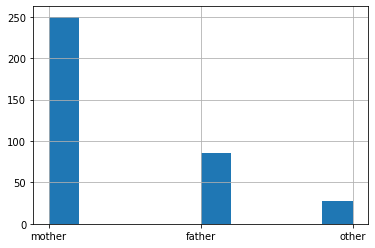

In [641]:
stud.guardian.hist()

In [643]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.guardian = stud.guardian.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [644]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.guardian.values != 'None' ].guardian.count() / len(stud)) * 100).round(2))

92.13


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 8%. Заменены на None, не удалялись
Некоректных данных нет.
Данные натораживают, т.к. не соотносятся с данными по колонке 'Pstatus', где большая часть учеников живет с двумя родителями
Следует в дальнейшем рассмотреть целесообразность этих данных
"""

# 12 traveltime

In [ ]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [645]:
stud.traveltime.describe()

count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [646]:
stud.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

In [647]:
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [648]:
stud.traveltime.value_counts(normalize=True)

1.0    0.661202
2.0    0.262295
3.0    0.057377
4.0    0.019126
Name: traveltime, dtype: float64

<AxesSubplot:>

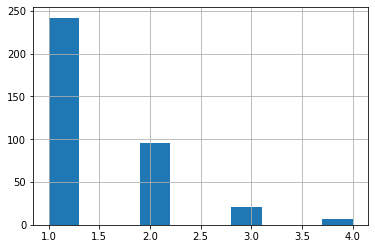

In [649]:
stud.traveltime.hist()

In [652]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.traveltime.values != None ].traveltime.count() / len(stud)) * 100).round(2))

92.89


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 8%.
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. большая часть судентов добирается до школы в течении 30 мин
"""

# 13 studytime

In [ ]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [653]:
stud.studytime.describe()

count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [654]:
stud.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [ ]:
stud.studytime.value_counts()

In [655]:
stud.studytime.value_counts(normalize=True)

2.0    0.501292
1.0    0.266150
3.0    0.162791
4.0    0.069767
Name: studytime, dtype: float64

<AxesSubplot:>

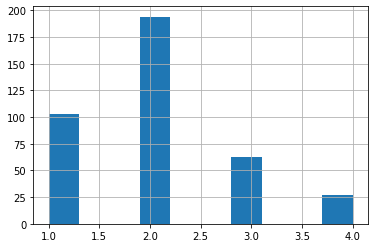

In [656]:
stud.studytime.hist()

In [658]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.studytime.values != None ].studytime.count() / len(stud)) * 100).round(2))

98.22


In [659]:
"""
Посмотрим на корреляцию между колонками 'studytime' и 'score'
"""
correlation = stud[['studytime', 'score']].corr()
correlation

,studytime,score
studytime,1.000000,0.114911
score,0.114911,1.000000


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 2%.
Некоректных данных нет.
Предплолагаю среднюю важность этих данных, т.к. корреляция невысокая и мало пропусков в данных
"""

# 14 failures

In [ ]:
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [660]:
stud.failures.describe()

count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [661]:
stud.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [662]:
stud.failures.value_counts()

0.0    292
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [663]:
stud.failures.value_counts(normalize=True)

0.0    0.784946
1.0    0.131720
2.0    0.043011
3.0    0.040323
Name: failures, dtype: float64

<AxesSubplot:>

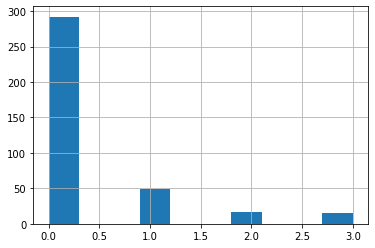

In [664]:
stud.failures.hist()

In [665]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.failures.values != None ].failures.count() / len(stud)) * 100).round(2))

94.42


In [666]:
"""
Посмотрим на корреляцию между колонками 'failures' и 'score'
"""
correlation = stud[['failures', 'score']].corr()
correlation

,failures,score
failures,1.00000,-0.34406
score,-0.34406,1.00000


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 6%.
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. большая часть студентов имеет значение '0', кроме того, критерий оценивания, 
когда (n>=4) = 0, смущает
Помимо этого, корреляция c Target низкая
"""

# 16 schoolsup

In [667]:
# дополнительная образовательная поддержка (yes или no)

In [668]:
stud.schoolsup.describe()

count     385
unique      2
top        no
freq      334
Name: schoolsup, dtype: object

In [669]:
stud.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [670]:
stud.schoolsup.value_counts()

no     334
yes     51
Name: schoolsup, dtype: int64

In [671]:
stud.schoolsup.value_counts(normalize=True)

no     0.867532
yes    0.132468
Name: schoolsup, dtype: float64

<AxesSubplot:>

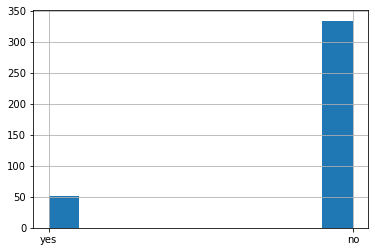

In [672]:
stud.schoolsup.hist()

In [674]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.schoolsup = stud.schoolsup.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.schoolsup.values != 'None' ].schoolsup.count() / len(stud)) * 100).round(2))

97.72


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 3%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. большая часть студентов имеет значение 'no'
"""

# 16 famsup

In [ ]:
# семейная образовательная поддержка (yes или no)

In [675]:
stud.famsup.describe()

count     355
unique      2
top       yes
freq      218
Name: famsup, dtype: object

In [676]:
stud.famsup.unique()

array(['no', 'yes', nan], dtype=object)

In [677]:
stud.famsup.value_counts()

yes    218
no     137
Name: famsup, dtype: int64

In [678]:
stud.famsup.value_counts(normalize=True)

yes    0.614085
no     0.385915
Name: famsup, dtype: float64

<AxesSubplot:>

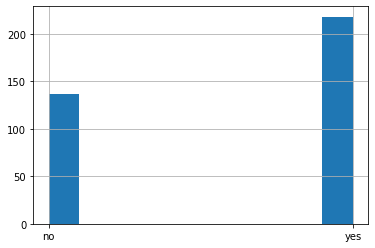

In [679]:
stud.famsup.hist()

In [785]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.famsup = stud.famsup.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.famsup.values != 'None' ].famsup.count() / len(stud)) * 100).round(2))

90.1


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 10%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. много пропусков в данных и непонятные критерии оценивания
"""

# 17 paid

In [681]:
# дополнительные платные занятия по математике (yes или no)

In [682]:
stud.paid.describe()

count     354
unique      2
top        no
freq      199
Name: paid, dtype: object

In [683]:
stud.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [684]:
stud.paid.value_counts()

no     199
yes    155
Name: paid, dtype: int64

In [685]:
stud.paid.value_counts(normalize=True)

no     0.562147
yes    0.437853
Name: paid, dtype: float64

<AxesSubplot:>

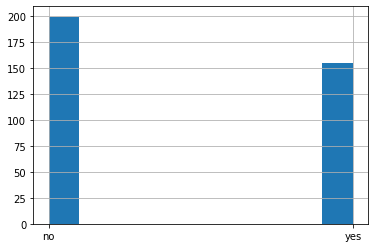

In [686]:
stud.paid.hist()

In [786]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.paid = stud.paid.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.paid.values != 'None' ].paid.count() / len(stud)) * 100).round(2))

89.85


In [ ]:
"""
В колонке есть пропуски данных, около 10%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. много пропусков в данных и непонятные критерии оценивания
Однако, все-же следует оценить корреляцию данных на Target
"""

# 18 activities

In [ ]:
# дополнительные внеучебные занятия (yes или no)

In [688]:
stud.activities.describe()

count     380
unique      2
top       yes
freq      194
Name: activities, dtype: object

In [689]:
stud.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [690]:
stud.activities.value_counts()

yes    194
no     186
Name: activities, dtype: int64

In [691]:
stud.activities.value_counts(normalize=True)

yes    0.510526
no     0.489474
Name: activities, dtype: float64

<AxesSubplot:>

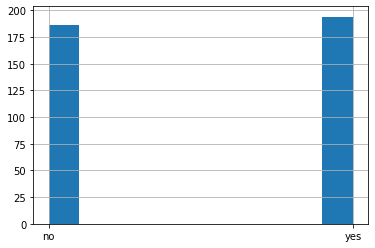

In [692]:
stud.activities.hist()

In [787]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.activities = stud.activities.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.activities.values != 'None' ].activities.count() / len(stud)) * 100).round(2))

96.45


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 5%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. непонятные критерии оценивания
Однако, все-же следует оценить корреляцию данных на Target
"""

# 19 nursery

In [ ]:
# посещал детский сад (yes или no)

In [694]:
stud.nursery.describe()

count     378
unique      2
top       yes
freq      299
Name: nursery, dtype: object

In [695]:
stud.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [696]:
stud.nursery.value_counts()

yes    299
no      79
Name: nursery, dtype: int64

In [697]:
stud.nursery.value_counts(normalize=True)

yes    0.791005
no     0.208995
Name: nursery, dtype: float64

<AxesSubplot:>

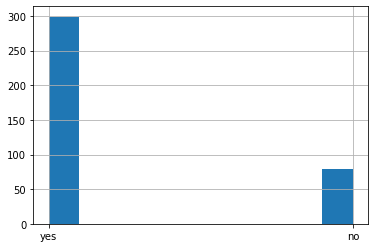

In [698]:
stud.nursery.hist()

In [788]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.nursery = stud.nursery.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.nursery.values != 'None' ].nursery.count() / len(stud)) * 100).round(2))

95.94


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 5%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. непонятные критерии оценивания и влияние на Target
"""

# 20 higher 

In [ ]:
# хочет получить высшее образование (yes или no)

In [700]:
stud.higher.describe()

count     374
unique      2
top       yes
freq      355
Name: higher, dtype: object

In [701]:
stud.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [702]:
stud.higher.value_counts()

yes    355
no      19
Name: higher, dtype: int64

In [703]:
stud.higher.value_counts(normalize=True)

yes    0.949198
no     0.050802
Name: higher, dtype: float64

<AxesSubplot:>

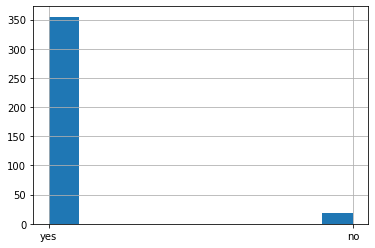

In [704]:
stud.higher.hist()

In [789]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.higher = stud.higher.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.higher.values != 'None' ].higher.count() / len(stud)) * 100).round(2))

94.92


In [ ]:
"""
В колонке есть пропуски данных, чуть более 5%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. слишком большой процент 'yes'
"""

# 21 internet

In [ ]:
# наличие интернета дома (yes или no)

In [706]:
stud.internet.describe()

count     360
unique      2
top       yes
freq      304
Name: internet, dtype: object

In [707]:
stud.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [708]:
stud.internet.value_counts()

yes    304
no      56
Name: internet, dtype: int64

In [709]:
stud.internet.value_counts(normalize=True)

yes    0.844444
no     0.155556
Name: internet, dtype: float64

<AxesSubplot:>

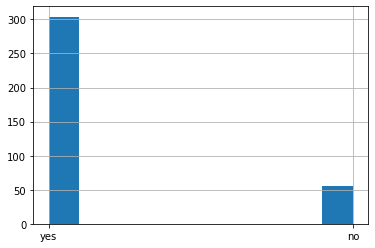

In [710]:
stud.internet.hist()

In [790]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.internet = stud.internet.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.internet.values != 'None' ].internet.count() / len(stud)) * 100).round(2))

91.37


In [ ]:
"""
В колонке есть пропуски данных, чуть более 8%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. слишком большой процент 'yes'
"""

# 22 romantic

In [ ]:
# в романтических отношениях (yes или no)

In [712]:
stud.romantic.describe()

count     363
unique      2
top        no
freq      239
Name: romantic, dtype: object

In [713]:
stud.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [714]:
stud.romantic.value_counts()

no     239
yes    124
Name: romantic, dtype: int64

In [715]:
stud.romantic.value_counts(normalize=True)

no     0.658402
yes    0.341598
Name: romantic, dtype: float64

<AxesSubplot:>

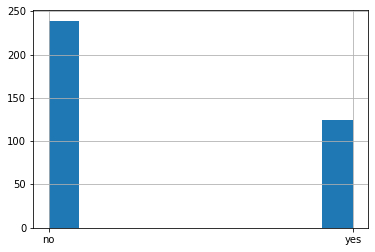

In [716]:
stud.romantic.hist()

In [791]:
"""
В данных присутсвуют Nan-ы, заменим их на None
"""
stud.romantic = stud.romantic.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

"""
Процент НЕ None-ов
"""
print (((stud[stud.romantic.values != 'None' ].romantic.count() / len(stud)) * 100).round(2))

92.13


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 8%. Заменены на None, не удалялись
Некоректных данных нет.
Предплолагаю низкую важность этих данных, т.к. непонятны критерии оценивания
Но следует соотрести эти данные с Target
"""

# 24 famrel

In [ ]:
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [718]:
stud.famrel.describe()

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [719]:
stud.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [720]:
stud.famrel.value_counts()

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [721]:
stud.famrel.value_counts(normalize=True)

 4.0    0.495913
 5.0    0.267030
 3.0    0.168937
 2.0    0.046322
 1.0    0.019074
-1.0    0.002725
Name: famrel, dtype: float64

<AxesSubplot:>

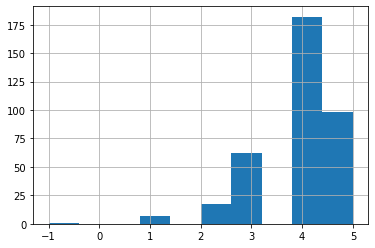

In [722]:
stud.famrel.hist()

In [723]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.famrel.values != None ].famrel.count() / len(stud)) * 100).round(2))

93.15


In [ ]:
"""
В данных присутсвуют nan-ы и одно значение в "-1"
Кол-во nan-ов - 27 (около 7%)
"""

In [792]:
"""
Т.к. в данных присутствует явно не правильное значение '-1', то удалим строку с этим значением
"""
stud = stud.loc[stud['famrel'] != -1]

In [730]:
"""
Посмотрим на корреляцию между колонками 'famrel' и 'score'
"""
correlation = stud[['famrel', 'score']].corr()
correlation

,famrel,score
famrel,1.000000,0.050228
score,0.050228,1.000000


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 7%.
Некоректных данные удалены
Слабая корреляция с Target, но данные отсекать не вижу смысла. Могут быть полезны
"""

# 24 freetime

In [ ]:
# свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [732]:
stud.freetime.describe()

count    382.000000
mean       3.238220
std        0.992521
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [736]:
stud.freetime.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [737]:
stud.freetime.value_counts()

3.0    153
4.0    112
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64

In [738]:
stud.freetime.value_counts(normalize=True)

3.0    0.400524
4.0    0.293194
2.0    0.159686
5.0    0.099476
1.0    0.047120
Name: freetime, dtype: float64

<AxesSubplot:>

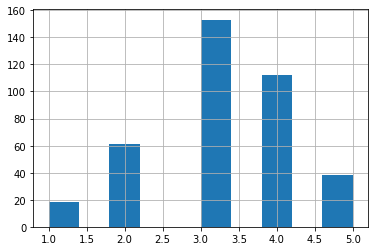

In [739]:
stud.freetime.hist()

In [793]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.freetime.values != None ].freetime.count() / len(stud)) * 100).round(2))

97.2


In [742]:
"""
Посмотрим на корреляцию между колонками 'freetime' и 'score'
"""
correlation = stud[['freetime', 'score']].corr()
correlation

,freetime,score
freetime,1.000000,0.018501
score,0.018501,1.000000


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 3%.
Некоректных данных нет
Слабая корреляция с Target, и не понятные критерии оценивания, но данные отсекать не вижу смысла, т.к. почти нормальное распределение
Могут быть полезны
"""

# 25 goout

In [ ]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [743]:
stud.goout.describe()

count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [745]:
stud.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [744]:
stud.goout.value_counts()

3.0    127
2.0     99
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [746]:
stud.goout.value_counts(normalize=True)

3.0    0.329870
2.0    0.257143
4.0    0.218182
5.0    0.135065
1.0    0.059740
Name: goout, dtype: float64

<AxesSubplot:>

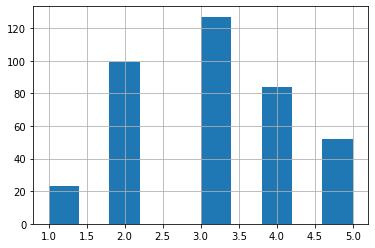

In [748]:
stud.goout.hist()

In [749]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.goout.values != None ].goout.count() / len(stud)) * 100).round(2))

97.96


In [751]:
"""
Посмотрим на корреляцию между колонками 'freetime', 'goout' и 'score'
"""
correlation = stud[['freetime', 'goout', 'score']].corr()
correlation

,freetime,goout,score
freetime,1.000000,0.29176,0.018501
goout,0.291760,1.00000,-0.130630
score,0.018501,-0.13063,1.000000


In [ ]:
"""
В колонке есть пропуски данных, чуть более 2%.
Некоректных данных нет
Низкая корреляция с Target и неплохая корреляция с данными по 'freetime', не понятные критерии оценивания
Распределение почти нормально, но данные представлются малополезными
"""

# 26 health

In [ ]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [752]:
stud.health.describe()

count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [753]:
stud.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [754]:
stud.health.value_counts()

5.0    137
3.0     89
4.0     62
1.0     47
2.0     43
Name: health, dtype: int64

In [755]:
stud.health.value_counts(normalize=True)

5.0    0.362434
3.0    0.235450
4.0    0.164021
1.0    0.124339
2.0    0.113757
Name: health, dtype: float64

<AxesSubplot:>

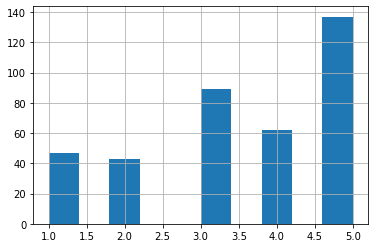

In [756]:
stud.health.hist()

In [757]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.health.values != None ].health.count() / len(stud)) * 100).round(2))

96.18


In [ ]:
"""
В колонке есть пропуски данных, чуть менее 4%.
Некоректных данных нет
Довариня к данным нет, т.к. кроме того, что сритерии оценивания не понятны и субьективны,
так и кроме того, почти четверть студентов ответили что чувствуют себя оочень плохо ('1' и '2')
"""

# 27 absences

In [758]:
# количество пропущенных занятий

In [759]:
stud.absences.describe()

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [760]:
stud.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   7.,   8.,  25.,  14.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [761]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [762]:
stud.absences.value_counts(normalize=True)

0.0      0.291339
2.0      0.157480
4.0      0.136483
6.0      0.081365
8.0      0.055118
10.0     0.044619
12.0     0.031496
14.0     0.028871
3.0      0.020997
16.0     0.018373
7.0      0.015748
18.0     0.013123
5.0      0.013123
20.0     0.010499
22.0     0.007874
9.0      0.007874
1.0      0.007874
15.0     0.005249
13.0     0.005249
11.0     0.005249
25.0     0.002625
54.0     0.002625
385.0    0.002625
26.0     0.002625
56.0     0.002625
24.0     0.002625
212.0    0.002625
21.0     0.002625
75.0     0.002625
30.0     0.002625
19.0     0.002625
38.0     0.002625
40.0     0.002625
23.0     0.002625
17.0     0.002625
28.0     0.002625
Name: absences, dtype: float64

<AxesSubplot:>

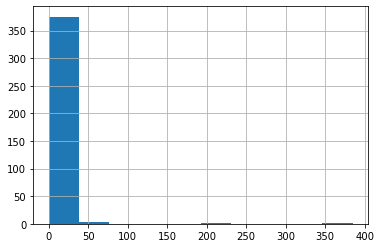

In [763]:
stud.absences.hist()

In [765]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.absences.values != None ].absences.count() / len(stud)) * 100).round(2))

96.95


In [ ]:
"""
Данные вызывают подозрание, т.к. есть слишком большие выбросы, хотя для реальной жизни это возможно
Посчитаем границы выбросов
"""

In [794]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print ('25-й перцентиль : %s,' % perc25)
print ('75-й перцентиль : %s ' % perc75)
print ("IQR : %s, " % format(IQR))
print ("Границы выбросов: [{f}, {l}]".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль : 0.0,
75-й перцентиль : 8.0 
IQR : 8.0, 
Границы выбросов: [-12.0, 20.0]


In [795]:
"""
Посчитаем кол-во учеников, выходящих за верхнюю границу выброса
"""

stud[stud.absences.values > 20]

c:\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,other,other,home,mother,2.0,2.0,1.0,no,None,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,None,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,services,teacher,other,mother,1.0,2.0,0.0,yes,None,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,other,services,home,mother,2.0,2.0,0.0,no,None,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


In [796]:
len(stud[stud.absences.values > 20])

c:\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


17

In [797]:
"""
Т.к. в данных присутствует явно выделяющиеся значения '212' и '385', то удалим эти данные
Остальные оставим, рассмотрим корреляцию с данными выше верхней границы выброса и без
"""
stud = stud.loc[stud['absences'] < 212]

In [800]:
"""
Создадим 2 датаФрейма, 
1 - все данные
2 - все данные, но за исключением студентов у которых колв-о прогулов больше границы выбросов
"""
stud_abs_1 = stud
stud_abs_2 = stud.loc[stud['absences'] <= 20]

In [803]:
"""
Посмотрим на корреляцию между колонками 'absences' и 'score' для stud_abs_1
"""
correlation = stud_abs_1[['absences', 'score']].corr()
correlation

,absences,score
absences,1.000000,0.033385
score,0.033385,1.000000


In [804]:
"""
Посмотрим на корреляцию между колонками 'absences' и 'score' для stud_abs_2
"""
correlation = stud_abs_2[['absences', 'score']].corr()
correlation

,absences,score
absences,1.000000,0.084593
score,0.084593,1.000000


In [805]:
"""
Т.к. корреляция между колонками 'absences' и 'score' выше, чем меньше в данных учеников с высоким кол-вом пропусков,
то предлагается удалить данные для учеников, у которых кол-во пропусков выше 20
"""
stud = stud.loc[stud['absences'] < 20]

# 28 score

In [807]:
# баллы по госэкзамену по математике

In [808]:
stud.score.describe()

count    355.000000
mean      51.943662
std       23.103725
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [810]:
stud.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  70.,  80.,  25.,  60.,  85.,
        90.,  65., 100.,  35.,  40.,   0.,  nan])

In [811]:
stud.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     28
70.0     27
60.0     27
40.0     24
45.0     23
80.0     16
30.0     14
90.0      9
35.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

<AxesSubplot:>

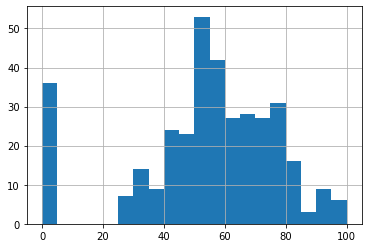

In [818]:
stud.score.hist(bins=20)

In [ ]:
"""
На гистограмме по распредедению данных видно, что
- большое кол-во данных с '0'. такие данные не информативны, т.к. находятся за пределами распределения нормали данных
думаю, их следует исключить
- распределение не имеет форму нормального, хотя довольно близко к такому (слишком мало оценок в районе 60-70)
это может говорить о ненадежности данных вообще!
"""

In [820]:
"""
Процент НЕ None-ов
"""
print (((stud[stud.score.values != None ].score.count() / len(stud)) * 100).round(2))

98.61


In [821]:
"""
Обнулим данные с Nan-ами
"""
stud = stud.fillna({'score':0})

In [823]:
"""
Удалим данные с '0'
"""
stud = stud.loc[stud['score'] > 0]

In [ ]:
"""
Данные в колонке 'score' весьма и весьма подозрительны!
"""

# 'studytime, granular' (Bonus)

In [828]:
stud['studytime, granular'].describebe()

count    314.000000
mean      -6.181529
std        2.570820
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

In [829]:
stud['studytime, granular'].unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

In [831]:
stud['studytime, granular'].value_counts()

-6.0     155
-3.0      82
-9.0      53
-12.0     24
Name: studytime, granular, dtype: int64

<AxesSubplot:>

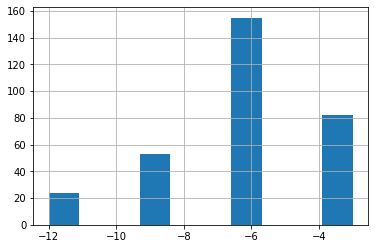

In [832]:
stud['studytime, granular'].hist()

In [ ]:
"""
Данные в этой колонке весьма похожи на данные из колонки 'studytime'
"""

<AxesSubplot:>

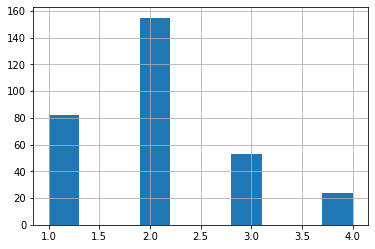

In [833]:
stud.studytime.hist()

In [834]:
stud['studytime'].value_counts()

2.0    155
1.0     82
3.0     53
4.0     24
Name: studytime, dtype: int64

In [ ]:
"""
Видно, что это те-же самые данные, только противоположны по знаку и посчитаны по формуле с множителем = 3
Думаю, их следует исклчить
"""

In [835]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [ ]:
"""
######################################################################################################################
# Корреляция данных
######################################################################################################################
"""

In [ ]:
"""
Построим таблицу корреляции числовых данных
"""

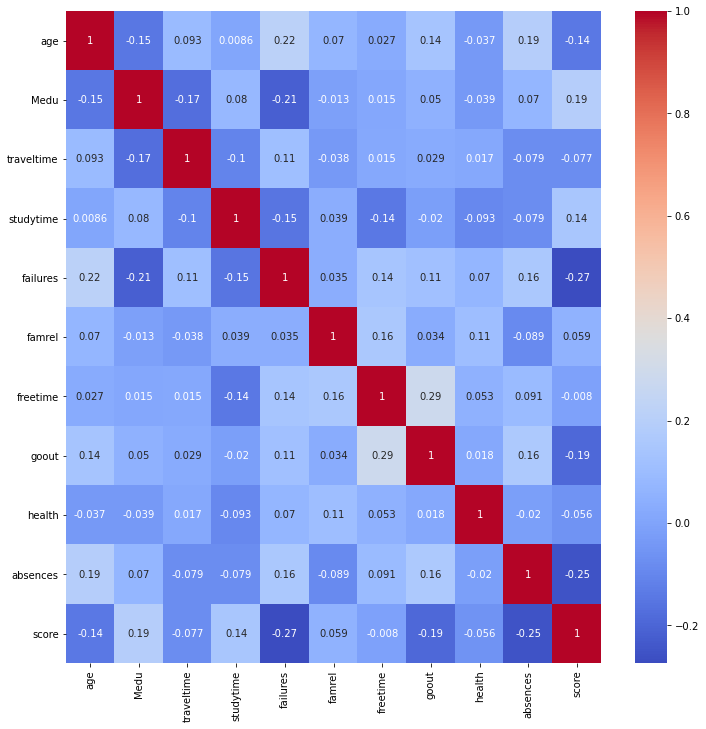

In [836]:
correlation = stud.corr()
correlation

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.gcf().set_size_inches(12, 12)

In [ ]:
"""
Видно, что хорошо скоррелированны следующие колонки:
['score', 'Medu', 'studytime', 'famrel', 'freetime', 'health']
"""

In [ ]:
"""
Проанализируем номинативные данные
"""

In [837]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

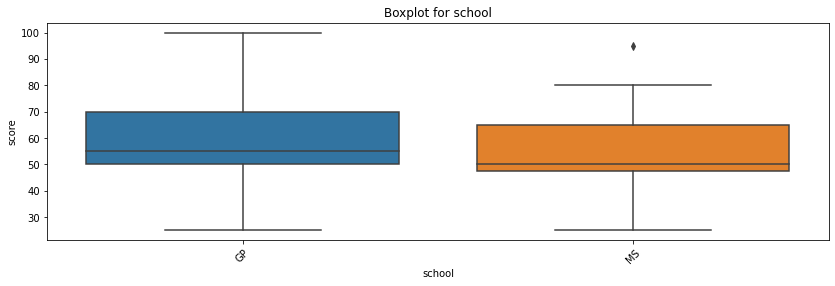

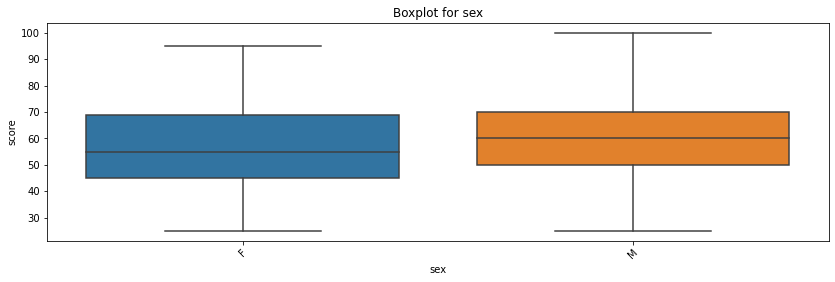

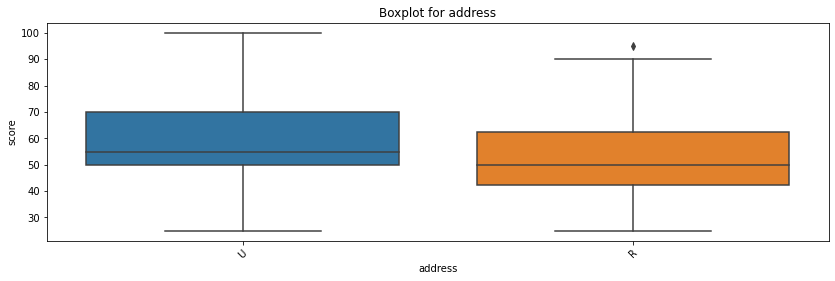

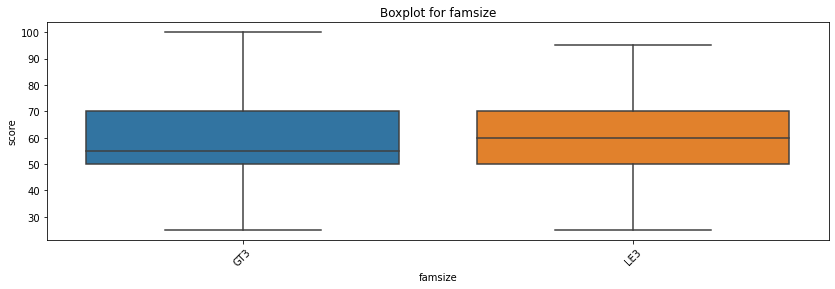

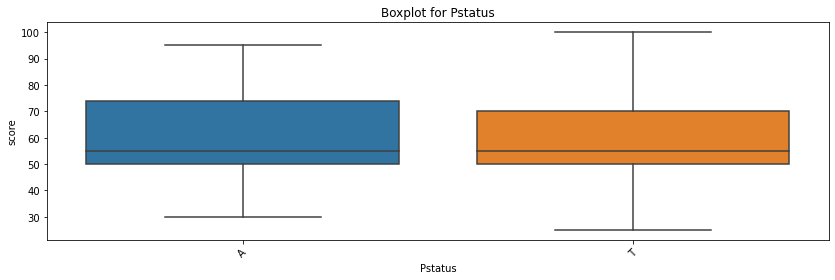

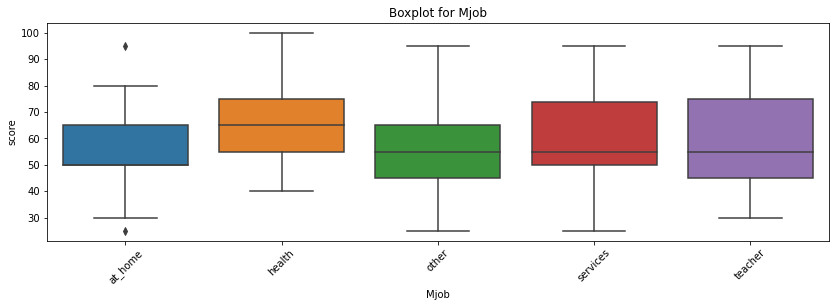

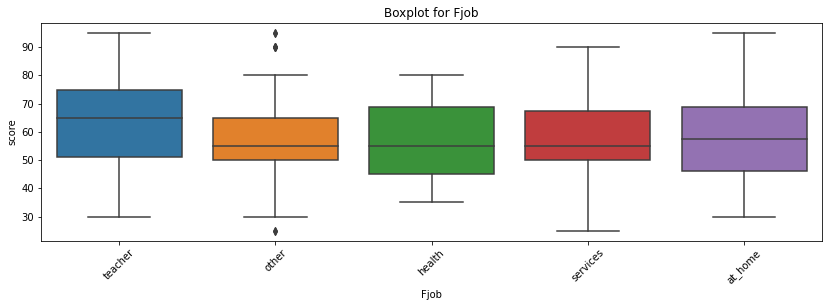

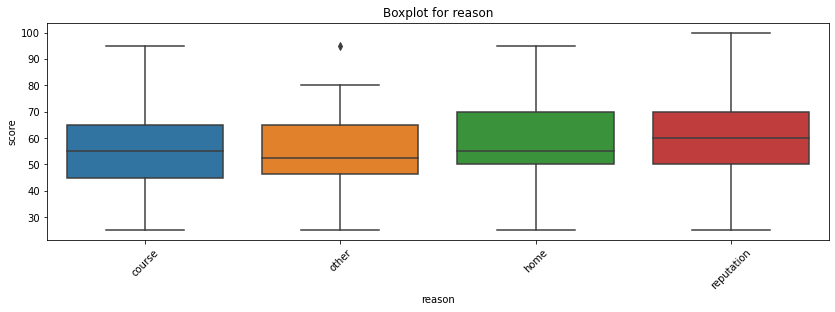

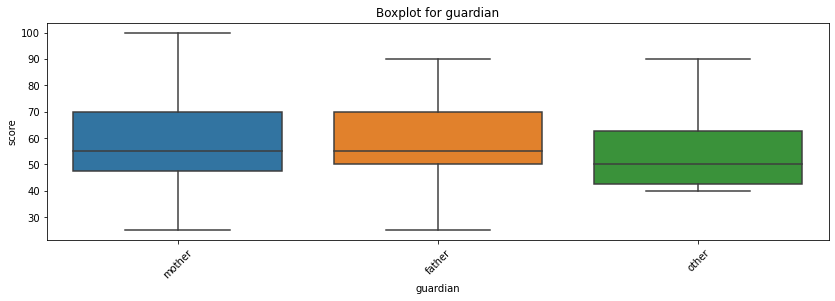

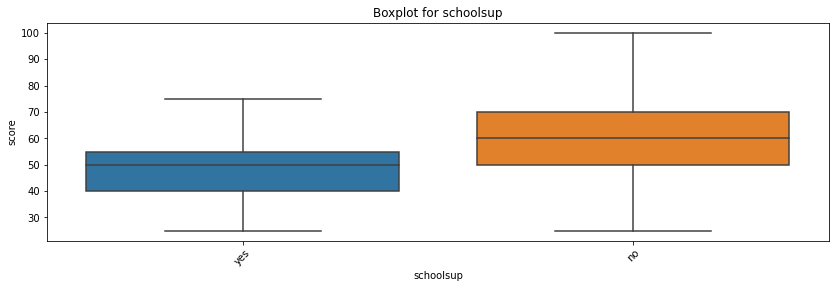

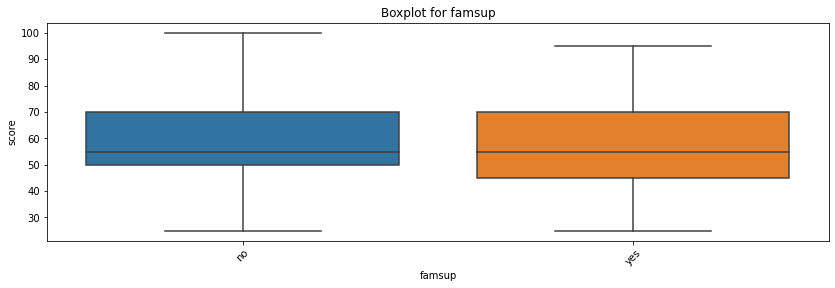

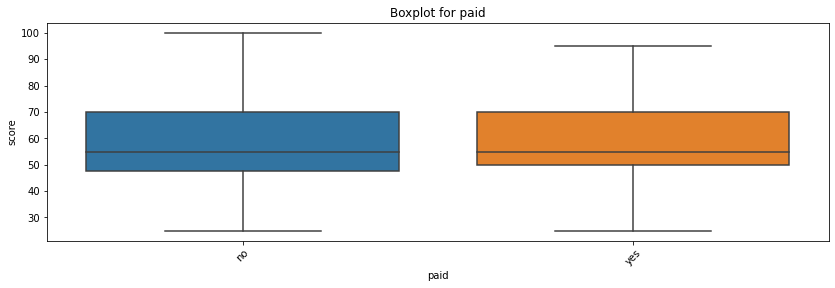

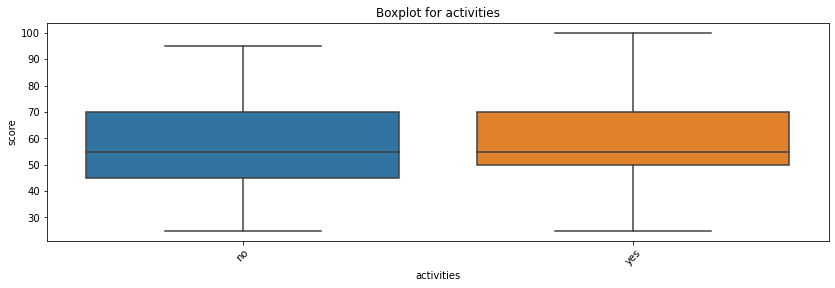

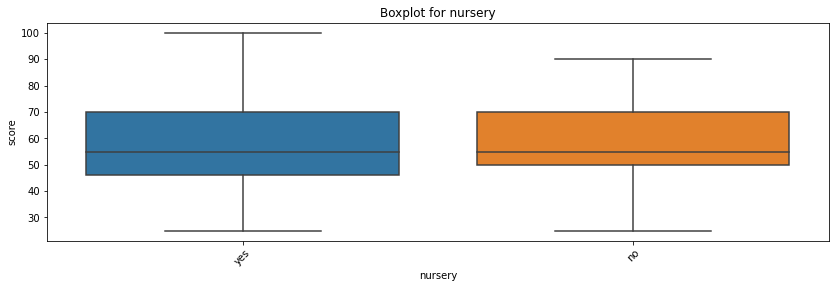

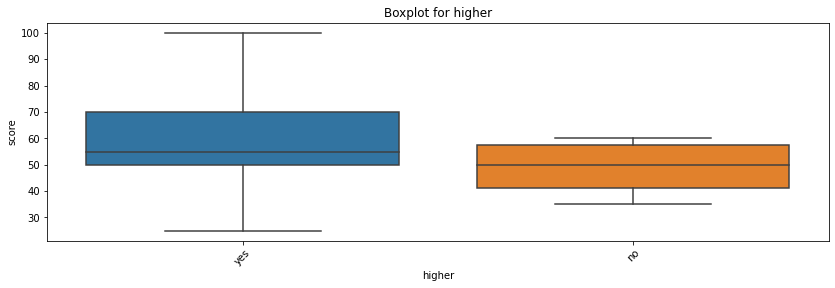

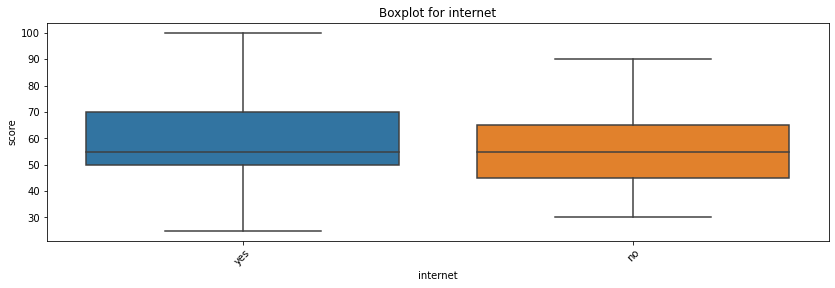

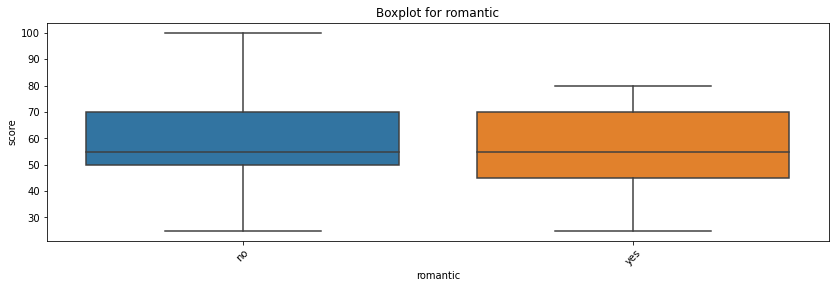

In [840]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', \
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
"""
По графикам можно предположить, что почти все данные имеют влияние, кроме
['famsize', 'Pstatus', 'reason', 'paid']
"""

In [ ]:
"""
Проверим данные с помощью теста Стюдента
"""

In [841]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [842]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', \
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [ ]:
"""
######################################################################################################################
# Выводы
######################################################################################################################
"""

In [ ]:
"""
1) В данных достаточно мало пустых значений (5-10%)

2) Выбросы найдены в нескольких колонках:
- 'Fedu' , 'famrel', 'absences', 'score', 
при том что в последней колонке, их было более 12% (значения Nan и '0') что говорит о плохом качестве данных!
Так-же, распределение значений в 'score' не похоже на нормальное (есть пропуски в значениях 60-70), что так-же вызывает подозрения!

3) Найдена корреляция между колонками 'Medu' и 'Fedu' (около 65%) и прямо-обратная корреляция 
между 'studytime' и 'studytime, granular'. Удалены колонки - 'Fedu' и 'studytime, granular'

4) Самые важные параметры, которые предполагается использовать для обучения модели:
['famsize', 'Pstatus', 'reason', 'paid', 'sex', 'address', 'Mjob', 'schoolsup']

"""